In [ ]:
#one-way ANOVA #집단별 각 변수의 차이가 유의미한가?

#데이터 로드

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/BDA(모델링)/ws_안심구역데이터

Mounted at /content/gdrive
/content/gdrive/My Drive/BDA(모델링)/ws_안심구역데이터


In [2]:
import pandas as pd
df= pd.read_csv('./클러스터링_용인.csv')

In [ ]:
# import pandas as pd
# df= pd.read_csv('/content/gdrive/MyDrive/BDA_안심데이터 공모전/클러스터링/클러스터링_용인.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/MyDrive/BDA_안심데이터 공모전/클러스터링/클러스터링_용인.csv'

In [3]:
df_anova=df.iloc[:,[1,2,3,4,5]]
df_anova

,입출차비율,소매/유통,의료/건강,70세_이상_비율,kmeans_cluster
0,0.64,0.012,0.002,0.23,2
1,0.60,0.009,0.001,0.20,2
2,0.33,0.048,0.006,0.11,1
3,0.28,0.013,0.020,0.12,1
4,0.27,0.049,0.026,0.11,1
5,0.26,0.027,0.010,0.15,1
6,0.24,0.035,0.013,0.11,1
7,0.24,0.038,0.009,0.14,1
8,0.24,0.035,0.008,0.11,1
9,0.24,0.042,0.009,0.09,1


In [5]:
# stats.shapiro(sample1)

#등분산성,정규성 검정

In [7]:
#등분산성 확인 - 레빈 검증
from scipy.stats import levene
print(levene(df_anova.입출차비율[df_anova.kmeans_cluster==1],
             df_anova.입출차비율[df_anova.kmeans_cluster==2],
             df_anova.입출차비율[df_anova.kmeans_cluster==0]))
##등분산성 만족함..

LeveneResult(statistic=3.2243846429765193, pvalue=0.05184860536999333)


In [8]:
#정규성 검정
from scipy.stats import shapiro
print(shapiro(df_anova.입출차비율[df_anova.kmeans_cluster==1]))
print(shapiro(df_anova.입출차비율[df_anova.kmeans_cluster==0]))

ShapiroResult(statistic=0.8270542169488756, pvalue=0.011000998752536397)
ShapiroResult(statistic=0.911697636386437, pvalue=0.05127780422385931)


In [ ]:
# #가정무시?
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# model = ols('입출차비율 ~ C(kmeans_cluster)', df_anova).fit()
# anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(kmeans_cluster),2.0,0.245076,0.122538,38.583326,1.407910e-09
Residual,35.0,0.111158,0.003176,NaN,NaN


#Kruskal-Wallis 검정(정규성 가정이 성립하지 않을때)

In [9]:
from scipy.stats import kruskal
print(kruskal(df_anova.loc[df_anova.kmeans_cluster==2,'입출차비율'],
              df_anova.loc[df_anova.kmeans_cluster==1,'입출차비율'],
              df_anova.loc[df_anova.kmeans_cluster==0,'입출차비율']))
## 집단간 '입출차비율'의 차이가 유의미하다

KruskalResult(statistic=12.312066407346508, pvalue=0.0021206487909005266)


In [10]:
from scipy.stats import kruskal
print(kruskal(df_anova.loc[df_anova.kmeans_cluster==2,'70세_이상_비율'],
              df_anova.loc[df_anova.kmeans_cluster==1,'70세_이상_비율'],
              df_anova.loc[df_anova.kmeans_cluster==0,'70세_이상_비율']))
## 집단간 '70세_이상_비율'의 차이가 유의미하다

KruskalResult(statistic=6.746955626741924, pvalue=0.03427024433653503)


In [ ]:
from scipy.stats import kruskal
print(kruskal(df_anova.loc[df_anova.kmeans_cluster==2,'의료/건강'],
              df_anova.loc[df_anova.kmeans_cluster==1,'의료/건강'],
              df_anova.loc[df_anova.kmeans_cluster==0,'의료/건강']))
# 집단간 '의료/건강'의 차이가 유의미하다

KruskalResult(statistic=24.676351555421302, pvalue=4.381253103910192e-06)


In [ ]:
from scipy.stats import kruskal
print(kruskal(df_anova.loc[df_anova.kmeans_cluster==2,'소매/유통'],
              df_anova.loc[df_anova.kmeans_cluster==1,'소매/유통'],
              df_anova.loc[df_anova.kmeans_cluster==0,'소매/유통']))
# 집단간 '소매/유통'의 차이가 유의미하다

KruskalResult(statistic=15.0026805171956, pvalue=0.0005523435905944054)


#사후검정

In [11]:
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df_anova['70세_이상_비율'], df_anova['kmeans_cluster'])
# Tukey's HSD 적용
post_hoc_res = comp.tukeyhsd()
print( post_hoc_res.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1   0.0092 0.4643 -0.0097 0.0281  False
     0      2   0.1114    0.0  0.0706 0.1522   True
     1      2   0.1021    0.0  0.0604 0.1439   True
---------------------------------------------------


#boxplot

In [18]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

<Axes: xlabel='kmeans_cluster', ylabel='70세_이상_비율'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.can

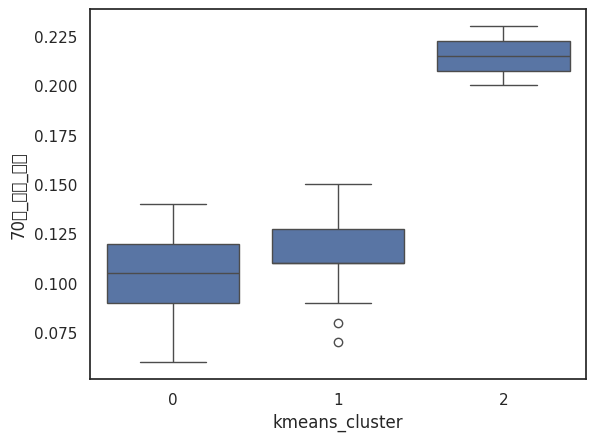

In [19]:
import seaborn as sns
sns.boxplot(y='70세_이상_비율',x='kmeans_cluster',data=df_anova)